In [12]:
import numpy as np
import pandas as pd

In [13]:
df=pd.read_csv('Spam5.csv',engine='python',encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [14]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [15]:
df.rename(columns={'v1':'Class','v2':'Text'},inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [17]:
df['Class']=encode.fit_transform(df.Class)


In [18]:
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df=df.drop_duplicates(keep='first')
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sazzad555\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['num_character']=df['Text'].apply(len)

C:\Users\SAZZAD~1\AppData\Local\Temp/ipykernel_4584/811164146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character']=df['Text'].apply(len)


In [23]:
df['num_word']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\SAZZAD~1\AppData\Local\Temp/ipykernel_4584/1520561888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [24]:
df['sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\SAZZAD~1\AppData\Local\Temp/ipykernel_4584/712013768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [25]:
df.sample()

,Class,Text,num_character,num_word,sentence
1710,0,"(No promises on when though, haven't even gott...",60,14,1


In [26]:
import seaborn as sns


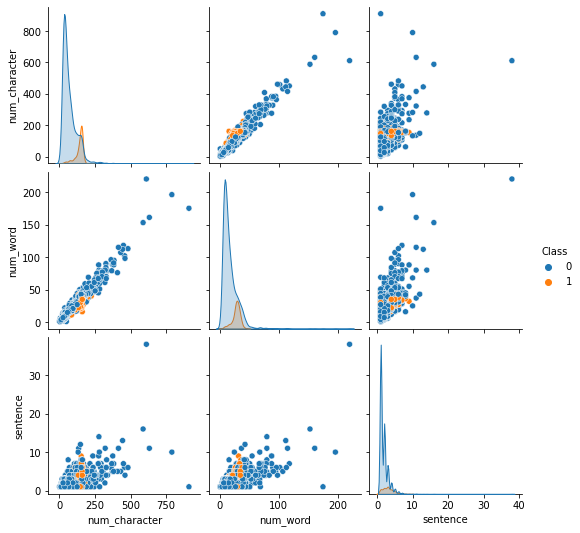

In [27]:
sns.pairplot(df,hue='Class')

<AxesSubplot:>

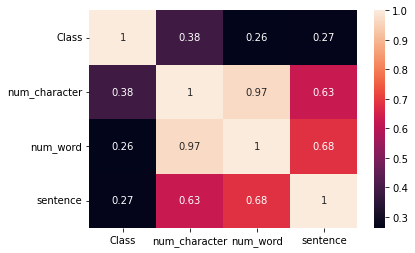

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
from nltk.stem.porter import PorterStemmer
p=PorterStemmer()
from nltk.corpus import stopwords
import string

In [30]:
def Processing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    
    t= []
    for i in text:
        if i.isalnum():
            t.append(i)
    
    text = t[:]
    t.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            t.append(i)
            
    text = t[:]
    t.clear()
    
    for i in text:
        t.append(p.stem(i))
    
            
    return " ".join(t)

In [31]:
df['new_text']=df.Text.apply(Processing)

C:\Users\SAZZAD~1\AppData\Local\Temp/ipykernel_4584/342940543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_text']=df.Text.apply(Processing)


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [33]:
!pip install wordcloud

In [34]:
spams=wc.generate(df[df.Class==1]['new_text'].str.cat(sep=" "))

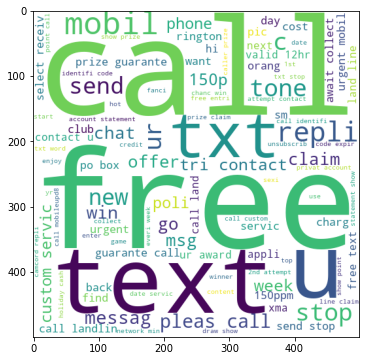

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spams)

In [36]:
import matplotlib.pyplot as plt

In [38]:
spams=[]
for token in df[df.Class==1]['new_text'].tolist():
        for word in token.split():
            spams.append(word)

In [39]:
from collections import Counter

C:\Users\sazzad555\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


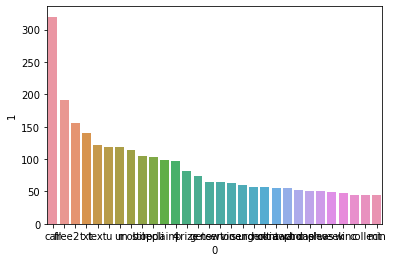

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

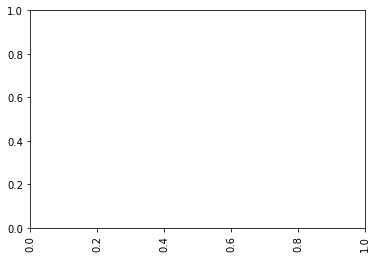

In [40]:
import seaborn as sns
sns.barplot(pd.DataFrame(Counter(spams).most_common(30))[0],pd.DataFrame(Counter(spams).most_common(30))[1])
plt.show()
plt.xticks(rotation='vertical')

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tf=TfidfVectorizer(max_features=3000)

In [43]:
x=tf.fit_transform(df.new_text).toarray()

In [44]:
x.shape
y=df.Class.values
y

array([0, 0, 1, ..., 0, 0, 0])

In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)

In [46]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score


In [47]:
MB=MultinomialNB()

In [48]:
MB.fit(xtrain,ytrain)
ypred = MB.predict(xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(precision_score(ytest,ypred))

0.9748549323017408
[[918   0]
 [ 26  90]]
1.0


In [50]:
import pickle
pickle.dump(tf,open('vector.pkl','wb'))
pickle.dump(MB,open('model.pkl','wb'))

In [53]:
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

tfidf = pickle.load(open('vector.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

st.title("Email/SMS Spam Classifier")

input_sms = st.text_area("Enter the message")

if st.button('Predict'):

    # 1. preprocess
    transformed_sms = transform_text(input_sms)
    # 2. vectorize
    vector_input = tfidf.transform([transformed_sms])
    # 3. predict
    result = model.predict(vector_input)[0]
    # 4. Display
    if result == 1:
        st.header("Spam")
    else:
        st.header("Not Spam")

2022-07-25 12:32:17.790 
  command:

    streamlit run C:\Users\sazzad555\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [52]:
pip install streamlit

  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19583 sha256=8c412c06056ada6cf6cce1c7d47816d8eaa6930e1725b75f791b3dcd729db44c
  Stored in directory: c:\users\sazzad555\appdata\local\pip\cache\wheels\2d\f0\a8\1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators
